In [1]:

import tensorflow as tf

# gpus = tf.config.experimental.list_physical_devices('GPU') 
# for gpu in gpus: tf.config.experimental.set_memory_growth(gpu, True)
from sys import getsizeof

from ipywidgets import interact, interactive
import os
import numpy as np
import sys
import timeit
import csv
sys.path.append('/Users/zhouji/Google Drive/YJ/GP_old')

sys.path.append('/Users/zhouji/Google Drive/YJ/')
import matplotlib.pyplot as plt

# import gempy as gp
# from gempy.core.tensor.tensorflow_graph_uncon import TFGraph
import tensorflow as tf
import tensorflow_probability as tfp
# import pandas as pd
# from gempy import create_data, map_series_to_surfaces
# from gempy.assets.geophysics import GravityPreprocessing
tfd = tfp.distributions
# import seaborn as sns
from GreenStone import *
# %%

grav_res = 10
X_r = np.linspace(704000,740000,grav_res)
Y_r = np.linspace(6.87e6,6.92e6,grav_res)

# X_r = [720000]
# Y_r = [6.9e6]

r = []
for x in X_r:
  for y in Y_r:
    r.append(np.array([x,y]))
receivers = np.array(r)
Z_r = 0
n_devices = receivers.shape[0]
xyz = np.meshgrid(X_r, Y_r, Z_r)
xy_ravel = np.vstack(list(map(np.ravel, xyz))).T

model = Model(receivers = receivers,dtype = 'float32')

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Active grids: ['regular']
Active grids: ['regular' 'sections']


In [2]:
model.activate_regular_grid()
model.compute_model()

2022-01-25 09:33:25.302985: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Volumes/GoogleDrive/My Drive/YJ/Green_Stone/GreenStone.py:472: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  [formation_block[l0: l1], self.TFG.scalar_matrix[:, l0: l1].numpy().astype(float)])


In [3]:
import matplotlib
matplotlib.__version__

'3.4.2'

In [4]:
model.solutions.scalar_field_matrix

array([[ 0.01751073,  0.01992504,  0.02237943, ..., -0.9689359 ,
        -0.9675706 , -0.96609086],
       [ 0.38577217,  0.3912627 ,  0.39673918, ...,  0.5216552 ,
         0.525542  ,  0.52934444],
       [ 0.26292443,  0.26938835,  0.27587163, ...,  0.10547912,
         0.1103161 ,  0.11509752]], dtype=float32)

In [5]:
model.solutions.scalar_field_at_surface_points

array([[0.06008248, 0.        , 0.        , 0.        ],
       [0.        , 0.7189857 , 0.7130704 , 0.        ],
       [0.        , 0.        , 0.        , 0.5528368 ]], dtype=float32)

In [6]:
from gempy.plot.visualization_2d_pro import *
p = Plot2D(model)

[6863000.0, 6930000.0, -20000.0, 0.0]


<AxesSubplot:>

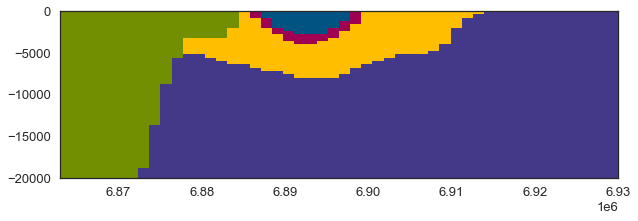

In [7]:
fig, ax = plt.subplots(1,1,figsize = (10,20))
ax.set_ylim(-20000,0)
ax.set_xlim(6863000,6930000)
p.plot_lith(ax,cell_number=[30], direction='x')

In [8]:
model.geo_data.additional_data

values
Structure isLith                                                          True
          isFault                                                        False
          number faults                                                      0
          number surfaces                                                    4
          number series                                                      4
          number surfaces per series                              [1, 2, 1, 0]
          len surfaces surface_points                         [27, 11, 15, 17]
          len series surface_points                            [27, 26, 17, 0]
          len series orientations                               [26, 2, 13, 0]
Options   dtype                                                        float64
          output                                                       geology
          theano_optimizer                                        fast_compile
          device                                                           cpu
          verbosity                                                       None
Kriging   range                                                   86591.223574
          $C_o$                                               178524761.904762
          drift equations                                         [3, 3, 3, 3]
Rescaling rescaling factor                                             97123.0
          centers                      [721180.0625, 6893494.75, -3951.360221]

In [9]:
model.geo_data.surfaces

,surface,series,order_surfaces,isActive,color,id,value_0
3,EarlyGranite,EarlyGranite_Series,1,True,#728f02,1,2.610000
0,SimpleMafic2,BIF_Series,1,True,#015482,2,2.920000
1,SimpleBIF,BIF_Series,2,True,#9f0052,3,3.100000
2,SimpleMafic1,SimpleMafic_Series,1,True,#ffbe00,4,2.920000
4,basement,Basement,1,True,#443988,5,2.610000


## Visualize in 3D

In [10]:
model._surfaces.df

,surface,series,order_surfaces,isBasement,isFault,isActive,color,vertices,edges,sfai,id,value_0
3,EarlyGranite,EarlyGranite_Series,1,False,False,True,#728f02,"[[696921.456938982, 6864340.0, -11516.0], [697...","[[2, 1, 0], [3, 2, 0], [4, 2, 3], [6, 5, 3], [...",NaN,1,2.61
0,SimpleMafic2,BIF_Series,1,False,False,True,#015482,"[[717368.193397522, 6884440.0, -204.0], [71742...","[[2, 1, 0], [0, 1, 3], [3, 1, 4], [4, 5, 3], [...",NaN,2,2.92
1,SimpleBIF,BIF_Series,2,False,False,True,#9f0052,"[[714997.480545044, 6883100.0, -204.0], [71538...","[[2, 1, 0], [0, 1, 3], [4, 3, 1], [5, 3, 4], [...",NaN,3,3.10
2,SimpleMafic1,SimpleMafic_Series,1,False,False,True,#ffbe00,"[[696000.0, 6868360.0, -788.6244201660156], [6...","[[2, 1, 0], [0, 1, 3], [4, 3, 1], [4, 1, 5], [...",NaN,4,2.92
4,basement,Basement,1,True,False,True,#443988,NaN,NaN,NaN,5,2.61


In [11]:
from gempy.plot.vista import GemPyToVista
import pyvista as pv

# add receivers at the ground surface
poly = pv.PolyData(xy_ravel)
geom = pv.Cone(direction=[0.0, 0.0, -1.0])
glyphs = poly.glyph(factor=1000.0,geom=geom)

cpos = [(809967.7671127327, 6976956.821086687, 59798.81960914651),
 (709486.0237214431, 6912891.447923428, -10548.781725443238),
 (-0.4282474375647143, -0.273916532441988, 0.8611468315416445)]

gpv = GemPyToVista(model)
# gpv.plot_surface_points(surfaces='all')
# gpv.p.add_mesh(glyphs, color="FFCC99",render_points_as_spheres=True,point_size=100)
# gpv.plot_structured_grid('lith',render_topography=False)
gpv.plot_surface_points()
gpv.plot_orientations()
# gpv.plot_surfaces()

gpv.p.add_bounding_box()

gpv.p.show(cpos = cpos)

[(809967.7671127327, 6976956.821086687, 59798.81960914651),
 (709486.0237214431, 6912891.447923428, -10548.781725443238),
 (-0.4282474375647143, -0.273916532441988, 0.8611468315416445)]

In [12]:
from gempy.plot.vista import GemPyToVista
import pyvista as pv

# add receivers at the ground surface
poly = pv.PolyData(xy_ravel)
geom = pv.Cone(direction=[0.0, 0.0, -1.0])
glyphs = poly.glyph(factor=1000.0,geom=geom)

cpos = [(809967.7671127327, 6976956.821086687, 59798.81960914651),
 (709486.0237214431, 6912891.447923428, -10548.781725443238),
 (-0.4282474375647143, -0.273916532441988, 0.8611468315416445)]

gpv = GemPyToVista(model)
gpv.plot_surface_points(surfaces='all')
gpv.p.add_mesh(glyphs, color="FFCC99",render_points_as_spheres=True,point_size=100)
# gpv.plot_structured_grid('lith',render_topography=False)
# gpv.plot_surface_points()
# gpv.plot_orientations()
gpv.plot_surfaces()

gpv.p.add_bounding_box()

gpv.p.show(cpos = cpos)